Simulation as demonstration of the work,

```
Tuckerman, M. E., C. J. Mundy, and G. J. Martyna. "On the 
classical statistical mechanics of non-Hamiltonian systems." 
EPL (Europhysics Letters) 45.2 (1999): 149.
```

The paper describes simulating systems like,
\begin{align}
\dot{x} &= \xi(x)
\end{align}

The paper describes computing the Jacobian and Riemannian metric,
\begin{align}
\kappa(x) &= \sum_i \frac{\partial \dot{x}_i}{\partial x} \\
\dot{J}(x_t; x_0) &= \kappa(x_t) J \\
\sqrt{g_t} &= \sqrt{g_0} J^{-1}
\end{align}

Then the invariant entropy is,
\begin{align}
S(t) &= - \int dx \sqrt{g_t} f(x_t) \log f(x_t)
\end{align}

Following the example at the end of the paper, we will be integrating,
\begin{align}
\dot{q} &= p \\
\dot{p} &= F(q) - \alpha p
\end{align}

Setting $ \alpha = \sum_i F_i p_i \big/ \sum_i p_i p_i $ at $ t=0 $ should make $ \sum_i p_i p_i $ constant.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
import time

N, time_steps = int(1e5), int(1e3)
bins, sample_rate = N/10, 100
q, p = np.random.randn(N), np.random.randn(N)

# Potential and 
phi = lambda q: 1e-3 * np.sum(q**2)
F   = lambda q: -1e-3 * q
alpha = np.sum(p * F(q))/np.sum(p * p)

# Dynamical equations
dq = lambda q, p: p
dp = lambda q, p: F(q) - alpha * p
dt = 1e-5

In [28]:
# Metric
g = lambda q, p: np.exp(-phi(q)*(N-1)/np.sum(p*p))

S, T = [], []
start_time = time.time()
for i in range(time_steps):
    p += dp(q, p) * (dt/2)
    q += dq(q, p) * dt
    p += dp(q, p) * (dt/2)
    
    if i % sample_rate == 0:
        pk = np.histogram2d(q, p, bins=bins, normed=True)[0].flatten()
        qk = g(q, p)*np.ones(pk.shape)
        S.append(entropy(pk=pk*qk, qk=qk))
        T.append(np.sum(p * p))
        print("Step", i+1, (time.time() - start_time)/60, (time.time() - start_time)/(i+1) * time_steps / 3600)

Step 1 0.0900669018427531 1.5011156267589993
Step 101 0.18158618609110513 0.02996471979961668
Step 201 0.2723740021387736 0.022584911602646557
Step 301 0.36336343685785927 0.02011979339130693
Step 401 0.4561717669169108 0.01895975904736898
Step 501 0.5507542689641317 0.018321833025724404
Step 601 0.6415365695953369 0.017790809799902406
Step 701 0.7326913674672445 0.01742014739078432
Step 801 0.8321219205856323 0.017314231218784358
Step 901 0.9232020537058513 0.017077360072049484


In [29]:
S, T = np.array(S), np.array(T)

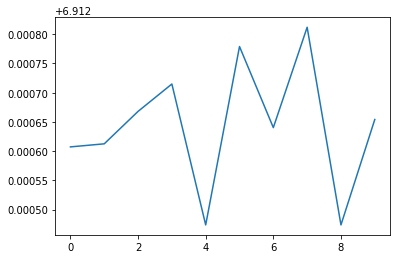

In [30]:
plt.plot(S)
plt.show()

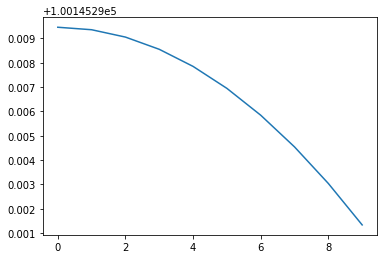

In [31]:
plt.plot(T)
plt.show()